In [1]:
#Packages import
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

In [2]:
file = open("initial_analytic_dataset.csv", "r")
analytic_data = pd.read_csv("initial_analytic_dataset.csv")

In [3]:
analytic_data

,id,total_pop_enrolled,percent_total_pop_enrolled,margin_total_pop,county,state,year,broadband_pct,est_total_pop_16_over,est_emp_pop_ratio_16_over,...,est_total_households_with_no4,est_total_households_none,est_total_households_with_sub,est_total_households_with_du,est_total_households_with_broadband,est_total_households_with_cellular,est_total_households_with_cell_no,est_total_households_with_cable,est_total_households_with_sat,est_total_households_without_sub
0,0500000US01003,35912,79.0,1447,Baldwin County,Alabama,2018,0.781,176222.0,58.3,...,27152.0,17291.0,153963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0500000US01015,17680,67.7,703,Calhoun County,Alabama,2018,0.730,93284.0,53.0,...,12240.0,8275.0,70466.0,19360.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01043,13985,78.8,760,Cullman County,Alabama,2018,0.699,66680.0,53.8,...,9116.0,6425.0,63420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01049,13367,86.8,617,DeKalb County,Alabama,2018,0.670,57239.0,51.7,...,7377.0,4884.0,49530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US01051,13077,72.0,544,Elmore County,Alabama,2018,0.796,65407.0,52.4,...,7550.0,4749.0,49630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,0500000US55133,66577,69.8,1072,Waukesha County,Wisconsin,2018,0.888,327449.0,65.3,...,42738.0,32341.0,304806.0,NaN,NaN,NaN,NaN,NaN,NaN,13272.0
822,0500000US55139,25205,61.7,856,Winnebago County,Wisconsin,2018,0.816,140227.0,62.8,...,15798.0,12199.0,129914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,0500000US55141,11256,76.1,557,Wood County,Wisconsin,2018,0.784,59152.0,60.6,...,8175.0,6765.0,56085.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,0500000US56021,16743,72.8,724,Laramie County,Wyoming,2018,0.839,78343.0,57.4,...,9752.0,6411.0,72288.0,NaN,NaN,NaN,NaN,NaN,NaN,10275.0


In [4]:
for col in analytic_data.columns:
    print(col)

id
total_pop_enrolled
percent_total_pop_enrolled
margin_total_pop
county
state
year
broadband_pct
est_total_pop_16_over
est_emp_pop_ratio_16_over
est_unemp_pop_ratio_16_over
est_total_households_x
est_med_income_households
est_total_families
est_med_income_families
est_total_households_y
est_total_households_with_device
est_total_households_with_desktop
est_total_households_with_no
est_total_households_with_smartphone
est_total_households_with_no2
est_total_households_with_portable
est_total_households_with_no3
est_total_households_with_other
est_total_households_with_no4
est_total_households_none
est_total_households_with_sub
est_total_households_with_du
est_total_households_with_broadband
est_total_households_with_cellular
est_total_households_with_cell_no
est_total_households_with_cable
est_total_households_with_sat
est_total_households_without_sub


In [6]:
analytic_data["broadband_pct"] = analytic_data["broadband_pct"] *100
analytic_data["broadband_pct"]

0      78.099996
1      73.000002
2      69.900000
3      66.999996
4      79.600000
         ...    
821    88.799995
822    81.599998
823    78.400004
824    83.899999
825    80.500001
Name: broadband_pct, Length: 826, dtype: float64

In [7]:
analytic_data

,id,total_pop_enrolled,percent_total_pop_enrolled,margin_total_pop,county,state,year,broadband_pct,est_total_pop_16_over,est_emp_pop_ratio_16_over,...,est_total_households_with_no4,est_total_households_none,est_total_households_with_sub,est_total_households_with_du,est_total_households_with_broadband,est_total_households_with_cellular,est_total_households_with_cell_no,est_total_households_with_cable,est_total_households_with_sat,est_total_households_without_sub
0,0500000US01003,35912,79.0,1447,Baldwin County,Alabama,2018,78.099996,176222.0,58.3,...,27152.0,17291.0,153963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0500000US01015,17680,67.7,703,Calhoun County,Alabama,2018,73.000002,93284.0,53.0,...,12240.0,8275.0,70466.0,19360.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01043,13985,78.8,760,Cullman County,Alabama,2018,69.900000,66680.0,53.8,...,9116.0,6425.0,63420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01049,13367,86.8,617,DeKalb County,Alabama,2018,66.999996,57239.0,51.7,...,7377.0,4884.0,49530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US01051,13077,72.0,544,Elmore County,Alabama,2018,79.600000,65407.0,52.4,...,7550.0,4749.0,49630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,0500000US55133,66577,69.8,1072,Waukesha County,Wisconsin,2018,88.799995,327449.0,65.3,...,42738.0,32341.0,304806.0,NaN,NaN,NaN,NaN,NaN,NaN,13272.0
822,0500000US55139,25205,61.7,856,Winnebago County,Wisconsin,2018,81.599998,140227.0,62.8,...,15798.0,12199.0,129914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,0500000US55141,11256,76.1,557,Wood County,Wisconsin,2018,78.400004,59152.0,60.6,...,8175.0,6765.0,56085.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,0500000US56021,16743,72.8,724,Laramie County,Wyoming,2018,83.899999,78343.0,57.4,...,9752.0,6411.0,72288.0,NaN,NaN,NaN,NaN,NaN,NaN,10275.0


Text(0.5, 0, 'Broadband Percentage')

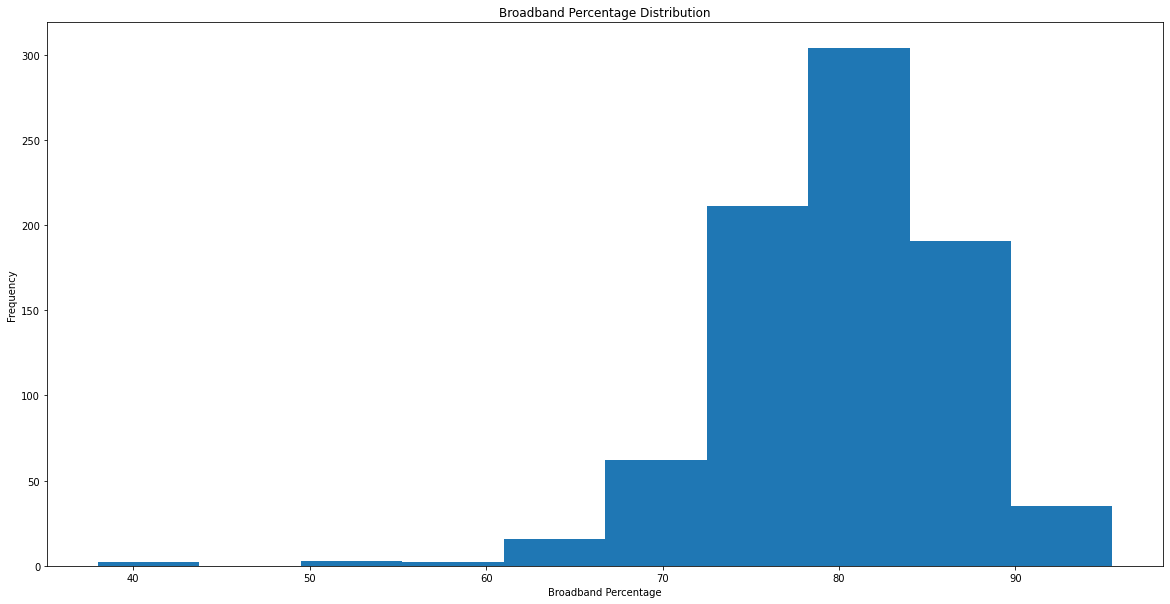

In [13]:
analytic_data["broadband_pct"].plot.hist(figsize=(20, 10))
plt.title("Broadband Percentage Distribution")
plt.xlabel("Broadband Percentage")

Text(0.5, 0, 'Total Pop Enrolled')

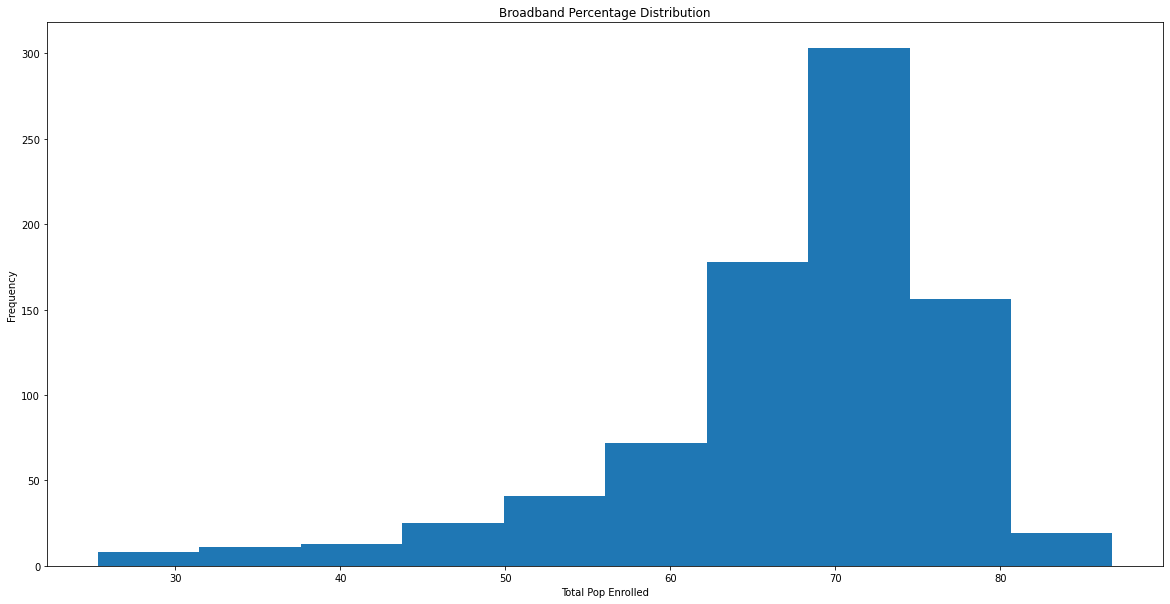

In [15]:
analytic_data["percent_total_pop_enrolled"].plot.hist(figsize=(20, 10))
plt.title("Broadband Percentage Distribution")
plt.xlabel("Total Pop Enrolled")

Text(0, 0.5, 'Total Population Enrolled')

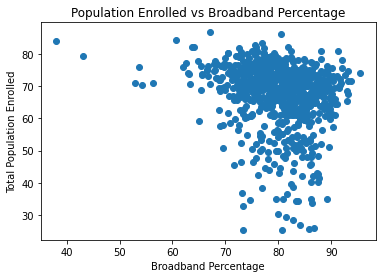

In [17]:
plt.scatter(x = analytic_data["broadband_pct"], y = analytic_data["percent_total_pop_enrolled"]) # The plot
plt.title("Population Enrolled vs Broadband Percentage") # Adding a title
plt.xlabel("Broadband Percentage") # Adding axis labels
plt.ylabel("Total Population Enrolled")